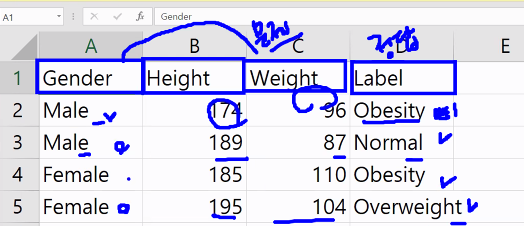

### 문제 정의
- 머신러닝을 통해서 어떤 문제를 해결할 것 인가?
- 지도 VS 비지도 VS 강화
- 지도 : 분류 VS 회귀 

- 비만을 판단하는 모델을 만들자
- 지도학습 - 분류모델 사용

### 데이터 수집
- CSV파일로 이루어진 데이터 수집
- 500명의 성별, 키, 몸무게, 비만도, 등급

In [1]:
# 판다스 라이브러리 불러와서 CSV 파일에 있는 데이터를 BMI라는 변수에 담아주기
# 항상 데이터 프레임의 형태로 데이터 가져오려면 pd.read_cvs

import pandas as pd

In [2]:
# 상대경로로 csv 불러오기
bmi = pd.read_csv('./data/bmi_500.csv')
bmi

,Gender,Height,Weight,Label
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight
...,...,...,...,...
495,Female,150,153,Extreme Obesity
496,Female,184,121,Obesity
497,Female,141,136,Extreme Obesity
498,Male,150,95,Extreme Obesity


### 데이터 전처리
- 결측치 처리 : 비어있는 데이터를 채워주기
- 이상치 처리: 정상 범위에서 벗어난 데이터 수정하기 (예) 숫자에 따른 등급이 맞지 않거나)

#### 결측치 확인
- 데이터 정보 및 결측치 확인하는 함수 : info()

In [3]:
bmi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Label   500 non-null    object
dtypes: int64(2), object(2)
memory usage: 15.8+ KB


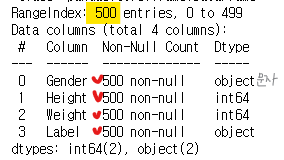

#### 이상치 확인
- describe() 함수 : 수치형 데이터만 분석 가능, 기술 통계

In [4]:
bmi.describe()

# count : 데이터 수 
# mean : 평균값
# std : 표준 편차
# min : 최소값
# 25% : 1분위수 
# 50% : 중앙값
# 75% : 3분위수
# max : 최대값

# 확인 순서
# 1. min, max 확인하기
# 2. 평균(mean)이랑 중앙값(50%) 차이가 어떤지 확인
# 3. 평균값과 중앙값의 수치가 비슷하지 않다면, min ~ max 까지 5개의 '간격'을 확인하기
                                    # => 각 구간의 데이터가 고르게 분포되어 있는지 확인
# 우리 데이터는 정상적인 데이터로 판단이 된다.

,Height,Weight
count,500.000000,500.000000
mean,169.944000,106.000000
std,16.375261,32.382607
min,140.000000,50.000000
25%,156.000000,80.000000
50%,170.500000,106.000000
75%,184.000000,136.000000
max,199.000000,160.000000


### 탐색적 데이터 분석(EDA)
- 데이터를 눈으로 살펴보자 - 그래프로 나타냄
- 비만도별로 데이터가 잘 나뉘어져 있는지 확인

#### 비만도 등급 확인

In [5]:
# 중복없이 값을 확인하는 함수 : unique()
bmi['Label'].unique()

array(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'], dtype=object)

#### 비만도가 Normal인 사람들만 추려보기

In [6]:
bmi

,Gender,Height,Weight,Label
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight
...,...,...,...,...
495,Female,150,153,Extreme Obesity
496,Female,184,121,Obesity
497,Female,141,136,Extreme Obesity
498,Male,150,95,Extreme Obesity


In [7]:
# normal  # 아래에서 실행 시키고 위로 올라온 것임

In [8]:
# 불리언 인덱싱 사용하여 Normal 등급인 사람만 꺼내오기
normal = bmi['Label'] == 'Normal' # 라벨이 노말인 사람있니?

# 산점도를 이용하여 데이터를 표현
scatter_data = bmi.loc[normal]  # 라벨이 'Normal'인 전체 행에 대한 데이터를 가지고 와서 저장
scatter_data

,Gender,Height,Weight,Label
1,Male,189,87,Normal
10,Male,195,81,Normal
13,Male,155,51,Normal
14,Male,191,79,Normal
24,Female,172,67,Normal
...,...,...,...,...
472,Female,178,65,Normal
477,Male,167,64,Normal
478,Female,151,55,Normal
487,Male,187,80,Normal


#### Normal인 사람들을 그래프로 그리기

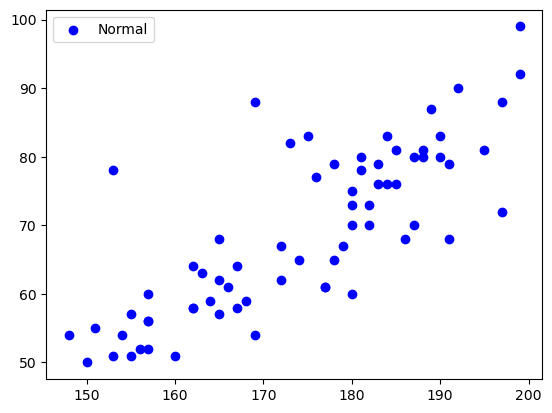

In [9]:
import matplotlib.pyplot as plt
plt.scatter(scatter_data['Height'], scatter_data['Weight'], color = 'blue', label='Normal')

plt.legend() # 차트에서 그린 label을 출력
plt.show()

#### 비만도가 'Obesity'인 사람만 추려서 그래프(color-green) 로 그려보기

In [10]:
# 불리언 인덱싱
obesity = bmi['Label']=='Obesity'
Oscatter_data = bmi.loc[obesity] #라벨이 Obesity 인 전체행을 가져옴
Oscatter_data

,Gender,Height,Weight,Label
0,Male,174,96,Obesity
2,Female,185,110,Obesity
9,Female,169,103,Obesity
11,Female,159,80,Obesity
22,Female,169,97,Obesity
...,...,...,...,...
483,Male,146,85,Obesity
484,Female,188,115,Obesity
485,Male,173,111,Obesity
488,Male,198,136,Obesity


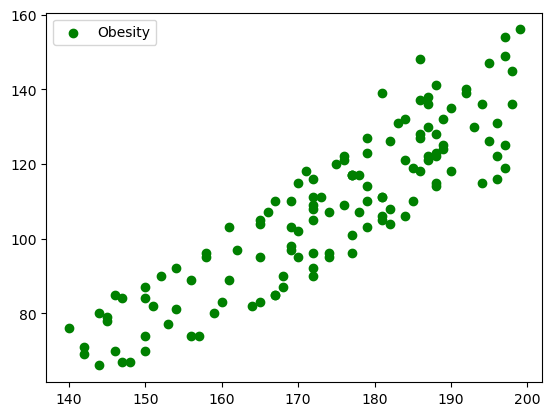

In [11]:
plt.scatter(Oscatter_data['Height'], Oscatter_data['Weight'], color = 'green', label = 'Obesity')
plt.legend()
plt.show()

#### 함수로 만들어서 그래프 그리기
- 반복되는 부분을 함수로 간략화(코드 간략화)

In [12]:
def myScatter(label, color) :   #  라벨명과 컬러명이 매개변수
    bmi_result = bmi['Label']==label
    scatter_data = bmi.loc[bmi_result] #라벨이 Obesity 인 전체행을 가져옴
    plt.scatter(scatter_data['Height'], scatter_data['Weight'], color = color, label = label)
                # x축에 height 값, y축에 weight 값

#### 전체 그래프 그리기

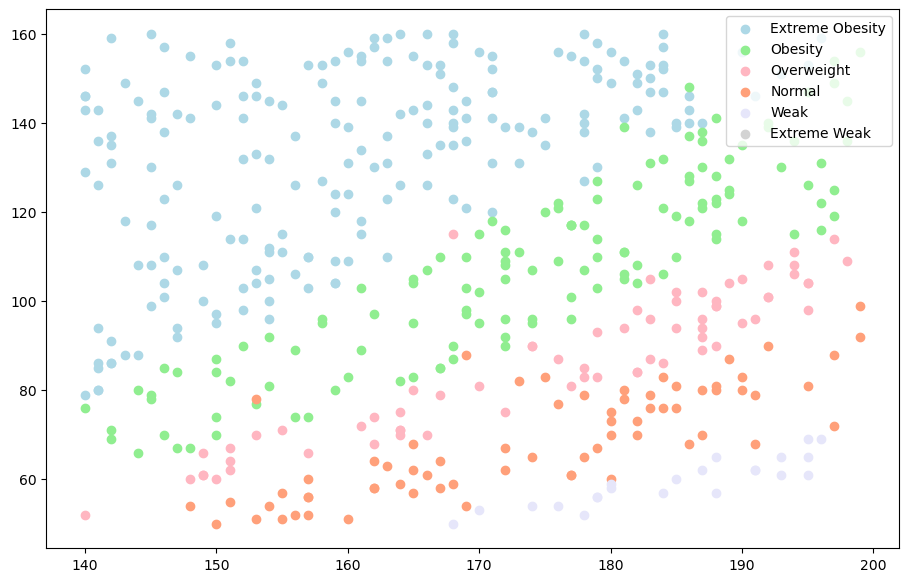

In [13]:
# 'Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak', 'Extreme Weak'

# 그래프 크기 조절
plt.figure(figsize = (11, 7))
myScatter('Extreme Obesity', 'lightblue')  # 파스텔 블루
myScatter('Obesity', 'lightgreen')  # 파스텔 그린
myScatter('Overweight', 'lightpink')  # 파스텔 핑크
myScatter('Normal', 'lightsalmon')  # 파스텔 오렌지
myScatter('Weak', 'lavender')  # 파스텔 퍼플
myScatter('Extreme Weak', 'lightgray')  # 파스텔 옐로우

plt.legend(loc='upper right')
plt.show()

In [14]:
# 이상치 수정하기 ( 검정=obesity 에 있는 파랑 = normal 데이터)
# 키가 153이고 몸무게가 78인 사람이 Normal로 잘못 표기
# Normal -> Obesity로 변경

bmi.loc[bmi['Weight'] == 78]

,Gender,Height,Weight,Label
165,Male,181,78,Normal
231,Female,153,78,Normal
234,Male,145,78,Obesity


In [15]:
bmi.loc[231,'Lable'] = 'Obesity'

###  모델 선택 및 하이퍼 파라미터 조정
- 머신러닝 모델 불러와서 사용하는 단계

#### 모델 불러오기
- KNN 모델

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
# 모델 생성
knn_model = KNeighborsClassifier(n_neighbors = 4)

> n_neighbors = 하이퍼 파라미터

>주어진 데이터에서 가장 가까운 이웃들을 기반으로 예측을 수행하는 알고리즘입니다. 
>n_neighbors 값이 클수록 더 많은 이웃을 고려하게 되며, 작을수록 더 적은 이웃만을 
> 고려하게 됩니다 <br> 예를 들어, n_neighbors=3으로 설정하면 모델은 주어진 
> 데이터 포인트와 가장 가까운 3개의 이웃을 선택하여 예측을 수행합니다.  


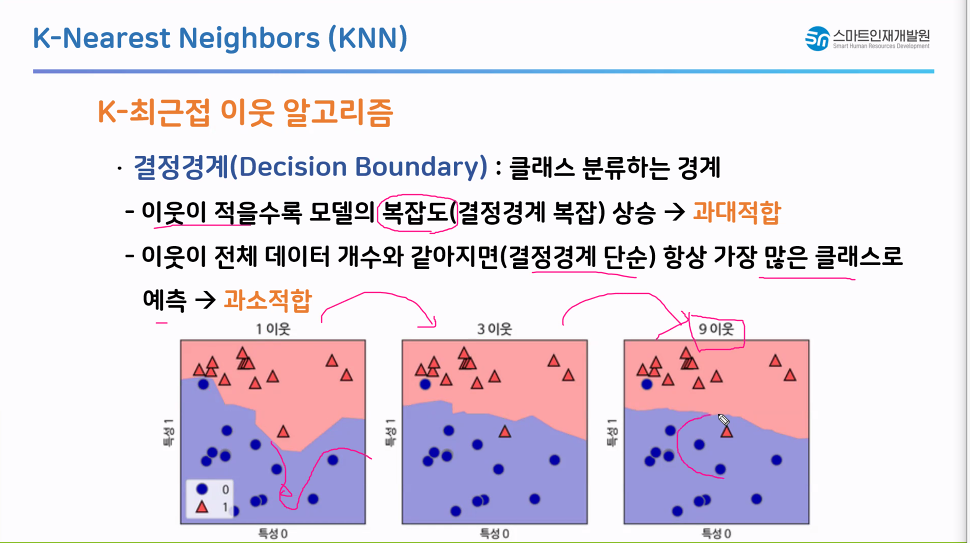

####  문제 데이터와 정답 데이터로 분리

In [18]:
# 머신러닝은 수치형 데이터만 학습할 수 있음
# 문자형 데이터 - 성별 컬럼은 학습할 수 없음
# 키/ 몸무게 컬럼만 문제 데이터

# 문제데이터 : Height, Weight
X = bmi.loc[:,'Height':'Weight']
print(X)
# 정답데이터 : Label
y = bmi.loc[:,'Label']
y

     Height  Weight
0       174      96
1       189      87
2       185     110
3       195     104
4       149      61
..      ...     ...
495     150     153
496     184     121
497     141     136
498     150      95
499     173     131

[500 rows x 2 columns]


0              Obesity
1               Normal
2              Obesity
3           Overweight
4           Overweight
            ...       
495    Extreme Obesity
496            Obesity
497    Extreme Obesity
498    Extreme Obesity
499    Extreme Obesity
Name: Label, Length: 500, dtype: object

#### 학습을 위해 훈련용(train)과 테스트용(test)으로 분리
- 훈련 70% : 평가 30% 
- 비율을 7:3 으로 한다.

In [19]:
# 350 : 150 => 인덱스 번호로는 0~349 & 350~499

X_train = X.iloc[:350]
X_test = X.iloc[350:]
y_train = y.iloc[:350]
y_test = y.iloc[350:]

In [20]:
# 데이터 크기 확인 -> shape
print('훈련용 문제 : ',X_train.shape)
print('훈련용 답 : ',y_train.shape)
print('테스트용 문제 : ',X_test.shape)
print('테스트용 답 : ',y_test.shape)

훈련용 문제 :  (350, 2)
훈련용 답 :  (350,)
테스트용 문제 :  (150, 2)
테스트용 답 :  (150,)


### 모델 학습

In [21]:
# fit(문제, 정답)
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [22]:
# 위가 학습한 결과물이다. 

###  모델 평가
- 새로운 데이터에 대해서 예측
- 모델이 제대로 만들어졌는지 평가

In [31]:
# 예측
knn_model.predict([[174,68]])

array(['Normal'], dtype=object)

In [32]:
# 평가 : 만들어진 모델에 평가 --> 학습에 사용하지 않은 새로운 문제(예측과 비교)
# 평가 수치 : 몇 개를 맞췄는지 확인

# score(평가용 문제데이터, 평가용 정답데이터)
# 평가용 문제데이터로 학습을 통해 발견한 규칙으로 예측 ==> 예측에 대한 정답(실제 정답은 아님)

# 결과 = 평가용 정답데이터와 예측된 정답을 비교해서 백분율로 나타낸 값

knn_model.score(X_test, y_test)

0.8933333333333333

In [25]:
# ↑ 100 개중 89 개를 맞춘다는 의미 ==>: Accuracy정확도 89.3%

In [33]:
knn_model.score(X_train, y_train)

# 테스트용 데이터보다 정확도가 높게 나오는 이유
# ==> 규칙을 찾는데 사용된 데이터를 기반으로 모델을 평가했기 때문에 score 가 높음

1.0

In [27]:
# warning 없애기
import warnings
warnings.filterwarnings('ignore')

### 하이퍼 파라미터 튜닝하기
- KNN 모델의 하이퍼 파라미터(n_neighbors)의 변화에 따라서 score 값을 확인
- 목표 : 최적의 하이퍼 파라미터를 찾겠다

In [43]:
from sklearn.neighbors import KNeighborsClassifier
# import 분류모델 
train_acc=[]
test_acc=[]

# n_neighbors를 1~30까지 생성
for i in range(1,31) :
    # n_neighbors를 변경해가면서 모델을 생성
    knn_model = KNeighborsClassifier(n_neighbors=i)
    # 생성된 모델에 학습
    knn_model.fit(X_train, y_train)
    
    # 만들어진 규칙으로 score값 저장
    # 과대적합, 과소적합 확인을 위한 데이터로 저장
    train_acc.append(knn_model.score(X_train,y_train))
    test_acc.append(knn_model.score(X_test,y_test))
    

#     print(f"{i}번째 score : {knn_model.score(X_test, y_test)}")

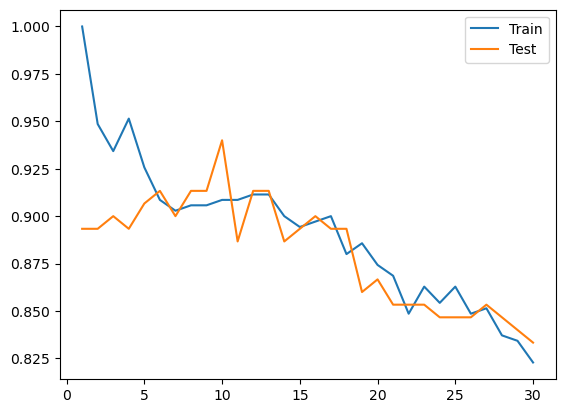

In [44]:
# 모델 복잡도 - 그래프로 확인하기
import matplotlib.pyplot as plt
# 선그래프 (x,y축 값이 필요)
# X축 : n_neighbors = range(1,31)
# y축 : 정확도(accuracy)
plt.plot(range(1,31), train_acc, label = 'Train')
plt.plot(range(1,31), test_acc, label = 'Test')

plt.legend()
plt.show()


KNN 알고리즘의 장단점
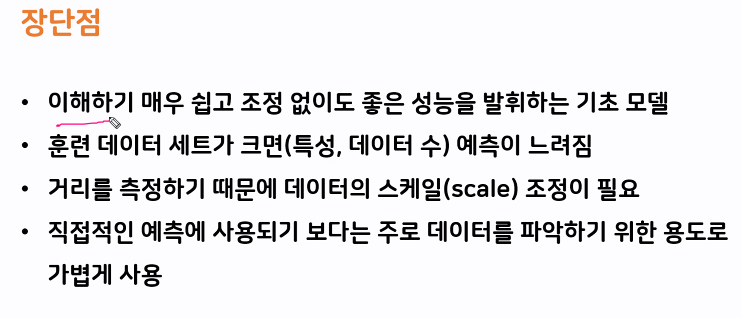

KNN : K =  미지의 수/ N = Nearest/ N= Neighbors  
"가까운 이웃을 찾아서 예측 포인트로 사용"  
- 분류(범주) : 이웃중에서 많은 값으로 예측  
- 회귀(수치) : 이웃의 값의 평균값으로 예측  
- 장점 : 간단하게 사용가능하고 성능이 괜찮음  
- 단점 : 특성 값의 범위(scale)를 모두 다 동일 하게 맞춰줘야 판단을 잘 함

과대 적합 : 규칙이 너무 많아서 특정 데이터(학습에 사용한)만 맞춤  
과소 적합 : 규칙이 너무 없어서 아무것도 못 맞춤  
일반화 : 규칙이 적당해서 잘 맞춤  
==> 일반화 하는게 머신러닝의 목표!

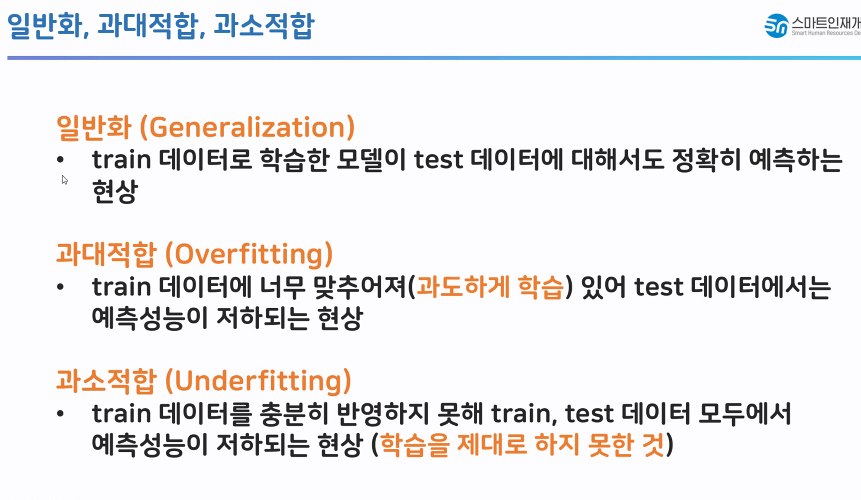

==머신러닝에서는==  
>과대적합 :  
- 훈련세트에 너무 많이 학습해서 규칙이 훈련세트에 맞춰짐  
- 훈련세트는 잘 맞추지만 평가세트는 잘 맞추지 못함  
>과소적합 :  
- 훈련세트에 너무 적게 학습해서 규칙이 조금만 만들어짐  
- 훈력세트도 잘 맞추지 못하고, 평가세트도 잘 맞추지 못함  
>일반화  
- 훈련세트에 적당히 학습해서 규칙이 적당하게 만들어짐  
- 훈련세트는 적당히 맞추고, 평가세트를 잘 맞추는 현상  